# This notebook contains all the code to generate graphs based on the csv from our survey
#### Its main purpose is to organize the data since the auto-genereated graphs were messy

# Import the necessary libraries

In [1]:
# pandas for dataframes and matplotlib for graphs
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# Import the survey Data

In [2]:
survey = pd.read_csv("race.csv")
survey.head(5)

,Timestamp,age,gender,country,state,area_type,race,self_considered,political_ideology,Were you born in the US?,...,demonstations,petitions,com_w_gov,get_pub_supp,fight_gov,civil_disobedience,ethinic_descrimination,other_ethnic_descrimination,interview,email
0,2022/05/04 8:35:45 PM AST,21,Woman,USA,NJ,Suburban,Black or African American,Democrat,Lean Liberal,Yes,...,4,6,3,2,1,1,Neither Agree nor Disagree,Strongly Agree,No,NaN
1,2022/05/04 8:38:40 PM AST,19,Man,United States,Massachusetts,Suburban,Black or African American,Republican,Strong Conservative,Yes,...,3,1,5,2,4,6,Strongly Disagree,Strongly Disagree,No,NaN
2,2022/05/04 8:40:15 PM AST,21,Woman,United States,MA,Urban,White;Hispanic or Latino,Democrat,Lean Liberal,Yes,...,7,7,5,2,1,1,Disagree,Agree,No,NaN
3,2022/05/04 8:40:23 PM AST,19,Woman,United States,New Jersey,Urban,Hispanic or Latino,Democrat,Strong Liberal,Yes,...,7,7,7,7,5,5,Strongly Agree,Strongly Agree,No,NaN
4,2022/05/04 8:40:39 PM AST,21,Man,Mexico / US,California,Suburban,Hispanic or Latino,Democrat,Strong Liberal,No,...,3,5,2,1,6,6,Agree,Strongly Agree,No,NaN


In [3]:
list_count = survey["country"]
list_count = list_count.tolist()
list_count

['USA',
 'United States',
 'United States',
 'United States ',
 'Mexico / US',
 'US',
 'US',
 'US',
 'US',
 'USA',
 'US',
 'USA',
 'Spain',
 'Mexico / US',
 'US',
 'US',
 'United States',
 'United States ',
 'France / US',
 'United States',
 'US',
 'United States',
 'United States',
 'United States',
 'United States',
 'USA',
 'US',
 'United States',
 'Serbia',
 'united states',
 'US',
 'USA',
 'USA',
 'USA',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'USA',
 'USA',
 'United States',
 'USA',
 'USA',
 'US',
 'Mexico',
 'USA',
 'USA',
 'United States',
 'USA',
 'US',
 'United States',
 'United States',
 'US',
 'USA',
 'USA',
 'USA',
 'United States',
 'US',
 'USA',
 'United States',
 'united states ',
 'US',
 'US',
 'United States',
 'United States',
 'US / Nigeria',
 'US',
 'USA',
 'US',
 'United States',
 'US',
 'United States ',
 'United States',
 'US',
 'US',
 'Unit

In [4]:
# get all the countries
for i in list_count:
    # print(i)
    if " / " in i:
        rem_counties = i.split(" / ")
        list_count.remove(i)
        list_count.append(rem_counties[0])
        list_count.append(rem_counties[1])
print(list_count)


['USA', 'United States', 'United States', 'United States ', 'US', 'US', 'US', 'US', 'USA', 'US', 'USA', 'Spain', 'US', 'US', 'United States', 'United States ', 'United States', 'US', 'United States', 'United States', 'United States', 'United States', 'USA', 'US', 'United States', 'Serbia', 'united states', 'US', 'USA', 'USA', 'USA', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'USA', 'USA', 'United States', 'USA', 'USA', 'US', 'Mexico', 'USA', 'USA', 'United States', 'USA', 'US', 'United States', 'United States', 'US', 'USA', 'USA', 'USA', 'United States', 'US', 'USA', 'United States', 'united states ', 'US', 'US', 'United States', 'United States', 'US', 'USA', 'US', 'United States', 'US', 'United States ', 'United States', 'US', 'US', 'United States', 'US', 'Italy', 'USA', 'US', 'United States', 'United States', 'United States', 'United States', 'USA', 'US', 'United States', 'Un

In [5]:
# make all US into united states
us_replacements = dict({"US" : "United States", "USA" : "United States", "The South" : "United States", "united states" : "United States"})

final_list_cont = []
for i in list_count:
    if us_replacements.get(i):
        final_list_cont.append(us_replacements.get(i))
    else:
        final_list_cont.append(i)
final_list_cont

['United States',
 'United States',
 'United States',
 'United States ',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Spain',
 'United States',
 'United States',
 'United States',
 'United States ',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Serbia',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Mexico',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United Sta

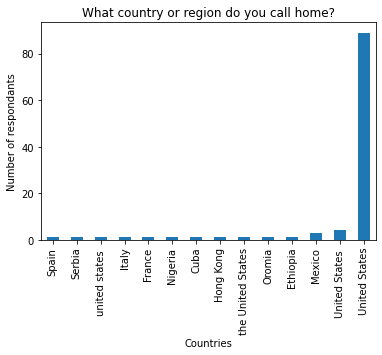

In [6]:
# get the Series of the names
x = final_list_cont

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Countries')
plt.ylabel('Number of respondants')
plt.title('What country or region do you call home?')

# show the plot
plt.show()

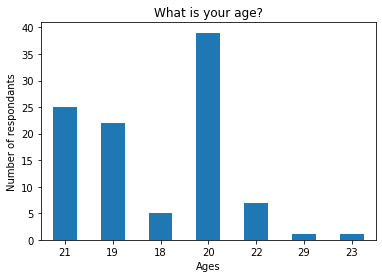

In [7]:
# age

# get the Series of the names
x = survey["age"]

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# create the plot
df.plot(kind='bar', legend = None, rot=0)

# Set the title and labels
plt.xlabel('Ages')
plt.ylabel('Number of respondants')
plt.title('What is your age?')

# show the plot
plt.show()


In [8]:
# 

# duplicate the 

# Fix the location data

In [9]:
survey.columns

Index(['Timestamp', 'age', 'gender', 'country', 'state', 'area_type', 'race',
       'self_considered', 'political_ideology', 'Were you born in the US?',
       'origin_country', 'citizen', 'us_foreign', 'need_war', 'not_superior',
       'aggro_econ', 'no_domination', 'good_people', 'like_americans',
       'dont_like_american', 'dont_care_americans', 'nat_anth_inspo',
       'flag_motivation', 'flag_not_important', 'dont_care_monument',
       'want_to_leave', 'origin_love', 'indifferent_countries', 'would_exile',
       'love_country', 'proud_amer', 'indiff_amer_culture', 'no_affection_us',
       'identify_ethnicity', 'importance_ethnicity', 'mem_of_ethnic',
       'close_w_group', 'join_ethnic_org', 'demonstations', 'petitions',
       'com_w_gov', 'get_pub_supp', 'fight_gov', 'civil_disobedience',
       'ethinic_descrimination', 'other_ethnic_descrimination', 'interview',
       'email'],
      dtype='object')

In [10]:
# FIX STATES
us_states = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [11]:
state = survey["state"].to_list()
state = [x for x in state if pd.isnull(x) == False]

state_list = []
for i in state:
    state_list.append(i.rstrip())
state_list

['NJ',
 'Massachusetts',
 'MA',
 'New Jersey',
 'California',
 'Georgia',
 'Tennessee',
 'Texas',
 'MA',
 'CA',
 'MA',
 'KS',
 'California',
 'California',
 'MI',
 'California',
 'California',
 'Maryland',
 'CA',
 'MA',
 'California',
 'PR',
 'Indiana',
 'California',
 'Florida',
 'Nevada',
 'California',
 'California',
 'California',
 'CA',
 'Ohio',
 'Colorado',
 'California',
 'MA',
 'Missouri',
 'Massachusetts',
 'California',
 'Illinois',
 'Texas',
 'California',
 'GA',
 'California',
 'Hawaii',
 'California',
 'California',
 'Indiana',
 'NJ',
 'California',
 'Texas',
 'California',
 'Massachusetts',
 'KY',
 'Oklahoma',
 'California',
 'California',
 'California',
 'California',
 'New York',
 'MA',
 'MA',
 'Massachusetts',
 'Nebraska',
 'Pennsylvania',
 'NJ',
 'New York',
 'Texas',
 'Massachusetts',
 'Texas',
 'NJ',
 'Massachusetts',
 'MA',
 'Pennsylvania',
 'South Carolina',
 'Tennessee',
 'NC',
 'Massachusetts',
 'Georgia',
 'MA',
 'Massachusetts',
 'Illinois',
 'Florida',
 'Mass

In [12]:
# what state you call home
final_list_state = []
for i in state_list:
    if us_states.get(i):
        final_list_state.append(us_states.get(i))
    else:
        final_list_state.append(i)
final_list_state

['NJ',
 'MA',
 'MA',
 'NJ',
 'CA',
 'GA',
 'TN',
 'TX',
 'MA',
 'CA',
 'MA',
 'KS',
 'CA',
 'CA',
 'MI',
 'CA',
 'CA',
 'MD',
 'CA',
 'MA',
 'CA',
 'PR',
 'IN',
 'CA',
 'FL',
 'NV',
 'CA',
 'CA',
 'CA',
 'CA',
 'OH',
 'CO',
 'CA',
 'MA',
 'MO',
 'MA',
 'CA',
 'IL',
 'TX',
 'CA',
 'GA',
 'CA',
 'HI',
 'CA',
 'CA',
 'IN',
 'NJ',
 'CA',
 'TX',
 'CA',
 'MA',
 'KY',
 'OK',
 'CA',
 'CA',
 'CA',
 'CA',
 'NY',
 'MA',
 'MA',
 'MA',
 'NE',
 'PA',
 'NJ',
 'NY',
 'TX',
 'MA',
 'TX',
 'NJ',
 'MA',
 'MA',
 'PA',
 'SC',
 'TN',
 'NC',
 'MA',
 'GA',
 'MA',
 'MA',
 'IL',
 'FL',
 'MA',
 'CT',
 'NY',
 'WV',
 'MA',
 'WA',
 'FL',
 'MA',
 'GA',
 'KY',
 'NY',
 'TX',
 'NY',
 'IA',
 'IL',
 'MA',
 'NV']

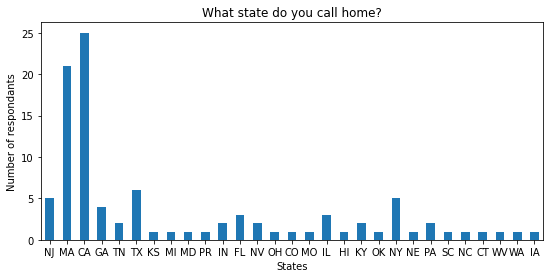

In [13]:
# state

# get the Series of the names
x = final_list_state

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# create the plot
df.plot(kind='bar', legend = None, rot=0, figsize=(9,4))

# Set the title and labels
plt.xlabel('States')
plt.ylabel('Number of respondants')
plt.title('What state do you call home?')

# show the plot
plt.show()


In [14]:
# reverse the dictionary if needed
# us_states = dict(map(reversed, us_state_to_abbrev.items()))

In [15]:
list_race = survey["race"]
list_race = list_race.to_list()

In [16]:
# get all the races
final_list_race = []
for i in list_race:
    if ";" in i:
        rem_race = i.split(";")
        list_race.remove(i)
        for j in range(len(rem_race)):
            final_list_race.append(rem_race[j])
    else: 
        final_list_race.append(i)
# final_list_race

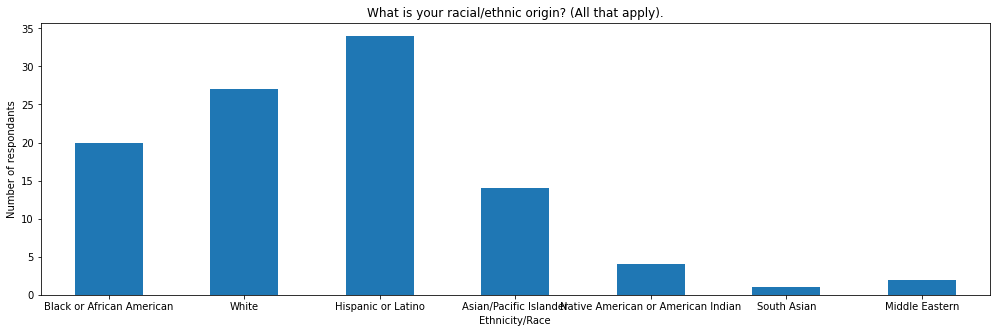

In [17]:
# get the Series of the names
x = final_list_race

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# create the plot
df.plot(kind='bar', legend = None, rot=0, figsize=(17,5))

# Set the title and labels
plt.xlabel('Ethnicity/Race')
plt.ylabel('Number of respondants')
plt.title('What is your racial/ethnic origin? (All that apply).')

# show the plot
plt.show()


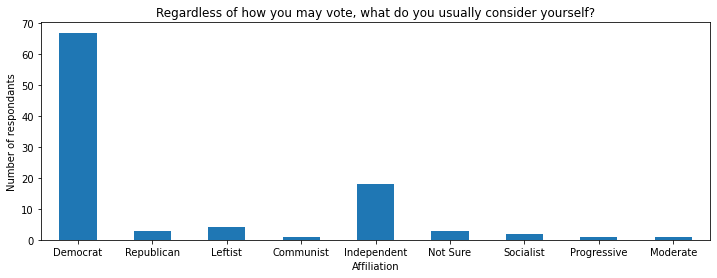

In [18]:
# Regardless of how you may vote, what do you usually consider yourself?
# get the Series of the names
x = survey["self_considered"]

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# create the plot
df.plot(kind='bar', legend = None, rot=0, figsize=(12,4))

# Set the title and labels
plt.xlabel('Affiliation')
plt.ylabel('Number of respondants')
plt.title('Regardless of how you may vote, what do you usually consider yourself?')

# show the plot
plt.show()


### Patriotism
#### 10, 11, 12, 13, 18, 19, 20, 21

### Nationalism
#### 1, 2, 3, 4, 5 

### National Attachment
#### 14, 15, 16, 17

### Concern for Co-nationals
#### 6, 7, 8, 9

In [19]:
patriotism = ["nat_anth_inspo", "flag_motivation", "flag_not_important", "dont_care_monument", 
"love_country", "proud_amer", "indiff_amer_culture", "no_affection_us"]

patriotism



['nat_anth_inspo',
 'flag_motivation',
 'flag_not_important',
 'dont_care_monument',
 'love_country',
 'proud_amer',
 'indiff_amer_culture',
 'no_affection_us']

In [20]:
# The more the United States actively influences other countries, the better off these countries will be.
x = survey["nat_anth_inspo"]

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df_pat = pd.DataFrame.from_dict(letter_counts, orient='index')
df_pat.columns = ["nat_anth_inspo"]
df_pat.head(10)


,nat_anth_inspo
Strongly Disagree,44
Strongly Agree,3
Disagree,29
Neither Agree nor Disagree,9
Agree,3
Somewhat Agree,4
Somewhat Disagree,8


In [21]:

dicts = []
for i in patriotism:
    x = survey[i]

    # use the Counter class from collections to create a dictionary with keys(text) and frequency
    name = i + "_dict"
    name = Counter(x)
    dicts.append(name)
# dicts
    


In [22]:
df_patriotism_final = pd.DataFrame.from_dict(dicts)
df_patriotism_final["question"] = patriotism
df_patriotism_final.head(15)

,Strongly Disagree,Strongly Agree,Disagree,Neither Agree nor Disagree,Agree,Somewhat Agree,Somewhat Disagree,question
0,44,3,29,9,3,4,8,nat_anth_inspo
1,46,3,26,9,4,5,7,flag_motivation
2,5,32,8,11,16,16,12,flag_not_important
3,5,30,9,19,7,10,20,dont_care_monument
4,14,9,10,23,6,18,20,love_country
5,19,7,14,25,6,19,10,proud_amer
6,8,15,14,17,10,21,15,indiff_amer_culture
7,10,15,11,20,12,18,14,no_affection_us


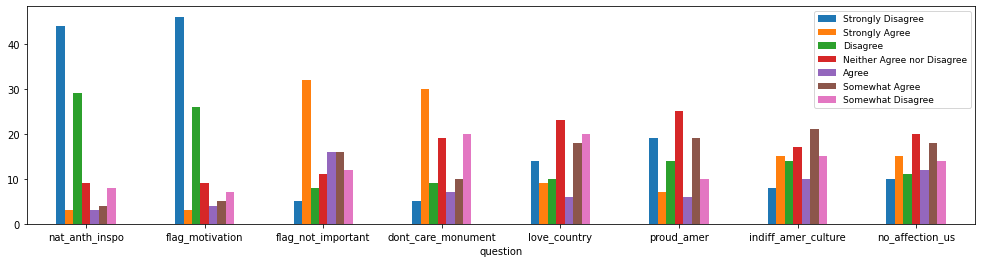

In [23]:
df_patriotism_final.plot(x="question", y = ["Strongly Disagree", "Strongly Agree", "Disagree", 
"Neither Agree nor Disagree", "Agree", "Somewhat Agree", "Somewhat Disagree"], kind = "bar", figsize = (17,4), rot = 0)
plt.legend(fontsize = 9)


In [24]:
nationalism = ["us_foreign", "need_war", "not_superior", "aggro_econ", "no_domination"]

In [25]:
dicts = []
for i in nationalism:
    x = survey[i]

    # use the Counter class from collections to create a dictionary with keys(text) and frequency
    name = i + "_dict"
    name = Counter(x)
    dicts.append(name)
# dicts

In [26]:
df_patriotism_final = pd.DataFrame.from_dict(dicts)
df_patriotism_final["question"] = nationalism
df_patriotism_final.head(15)

,Somewhat Disagree,Strongly Disagree,Somewhat Agree,Disagree,Neither Agree nor Disagree,Agree,Strongly Agree,question
0,25,33,11,23,6,2,NaN,us_foreign
1,10,46,8,22,8,4,2.0,need_war
2,13,4,18,3,7,25,30.0,not_superior
3,15,21,18,21,12,9,4.0,aggro_econ
4,4,4,10,2,5,18,57.0,no_domination


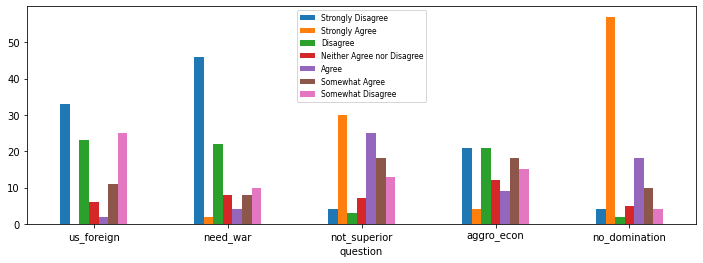

In [27]:
df_patriotism_final.plot(x="question", y = ["Strongly Disagree", "Strongly Agree", "Disagree", 
"Neither Agree nor Disagree", "Agree", "Somewhat Agree", "Somewhat Disagree"], kind = "bar", figsize = (12,4), rot=0)
plt.legend(fontsize = 7.5, loc="upper center")

In [28]:
### National Attachment
#### 14, 15, 16, 17

national_attachment = ["want_to_leave", "origin_love", "indifferent_countries", "would_exile"]

### Concern for Co-nationals
#### 6, 7, 8, 9

concern_co_nat = ["good_people", "like_americans", "dont_like_american", "dont_care_americans"]

In [29]:
dicts = []
for i in national_attachment:
    x = survey[i]

    # use the Counter class from collections to create a dictionary with keys(text) and frequency
    name = i + "_dict"
    name = Counter(x)
    dicts.append(name)
# dicts

In [30]:
df_patriotism_final = pd.DataFrame.from_dict(dicts)
df_patriotism_final["question"] = national_attachment
df_patriotism_final.head(15)

,Neither Agree nor Disagree,Strongly Agree,Strongly Disagree,Agree,Disagree,Somewhat Disagree,Somewhat Agree,question
0,16,8,14,7,20,23,12,want_to_leave
1,13,29,3,26,4,4,21,origin_love
2,6,2,27,2,37,21,5,indifferent_countries
3,11,13,12,6,16,19,23,would_exile


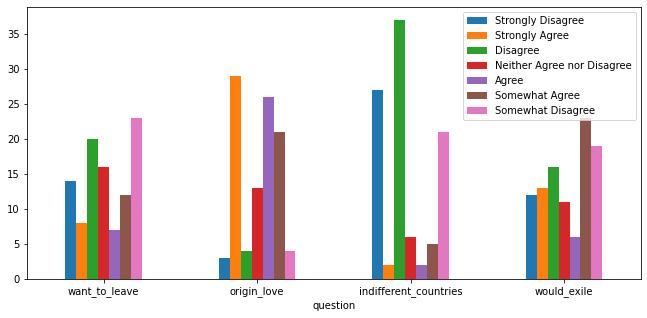

In [31]:
df_patriotism_final.plot(x="question", y = ["Strongly Disagree", "Strongly Agree", "Disagree", 
"Neither Agree nor Disagree", "Agree", "Somewhat Agree", "Somewhat Disagree"], kind = "bar", figsize = (11,5), rot=0)
plt.legend(fontsize = 10)

In [32]:
dicts = []
for i in concern_co_nat:
    x = survey[i]

    # use the Counter class from collections to create a dictionary with keys(text) and frequency
    name = i + "_dict"
    name = Counter(x)
    dicts.append(name)
# dicts

In [33]:
df_co_nat_final = pd.DataFrame.from_dict(dicts)
df_co_nat_final["question"] = concern_co_nat
df_co_nat_final.head(15)

,Neither Agree nor Disagree,Agree,Somewhat Agree,Disagree,Strongly Disagree,Somewhat Disagree,Strongly Agree,question
0,30,8,18,21,9,12,2,good_people
1,30,6,21,19,8,12,4,like_americans
2,24,8,12,20,14,19,3,dont_like_american
3,9,3,3,30,34,20,1,dont_care_americans


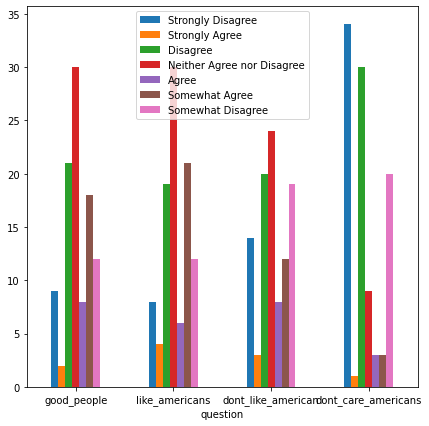

In [34]:
df_co_nat_final.plot(x="question", y = ["Strongly Disagree", "Strongly Agree", "Disagree", 
"Neither Agree nor Disagree", "Agree", "Somewhat Agree", "Somewhat Disagree"], kind = "bar", figsize = (7,7), rot=0)
plt.legend(fontsize = 10)

In [35]:
state = survey["state"].to_list()

state_list = []
for i in state:
    state_list.append(str(i).rstrip())
state_list

['NJ',
 'Massachusetts',
 'MA',
 'New Jersey',
 'California',
 'Georgia',
 'Tennessee',
 'Texas',
 'MA',
 'CA',
 'MA',
 'KS',
 'nan',
 'California',
 'California',
 'MI',
 'California',
 'California',
 'Maryland',
 'CA',
 'MA',
 'California',
 'PR',
 'Indiana',
 'California',
 'Florida',
 'Nevada',
 'California',
 'nan',
 'California',
 'California',
 'CA',
 'Ohio',
 'Colorado',
 'California',
 'MA',
 'Missouri',
 'Massachusetts',
 'California',
 'Illinois',
 'Texas',
 'California',
 'GA',
 'California',
 'Hawaii',
 'California',
 'California',
 'Indiana',
 'NJ',
 'California',
 'Texas',
 'California',
 'Massachusetts',
 'KY',
 'Oklahoma',
 'California',
 'California',
 'California',
 'California',
 'New York',
 'MA',
 'MA',
 'Massachusetts',
 'Nebraska',
 'Pennsylvania',
 'NJ',
 'New York',
 'Texas',
 'Massachusetts',
 'Texas',
 'NJ',
 'Massachusetts',
 'MA',
 'Pennsylvania',
 'South Carolina',
 'Tennessee',
 'NC',
 'Massachusetts',
 'Georgia',
 'MA',
 'Massachusetts',
 'Illinois',
 '

In [36]:
final_list_state = []
for i in state_list:
    if us_states.get(i):
        final_list_state.append(us_states.get(i))
    else:
        final_list_state.append(i)
final_list_state

['NJ',
 'MA',
 'MA',
 'NJ',
 'CA',
 'GA',
 'TN',
 'TX',
 'MA',
 'CA',
 'MA',
 'KS',
 'nan',
 'CA',
 'CA',
 'MI',
 'CA',
 'CA',
 'MD',
 'CA',
 'MA',
 'CA',
 'PR',
 'IN',
 'CA',
 'FL',
 'NV',
 'CA',
 'nan',
 'CA',
 'CA',
 'CA',
 'OH',
 'CO',
 'CA',
 'MA',
 'MO',
 'MA',
 'CA',
 'IL',
 'TX',
 'CA',
 'GA',
 'CA',
 'HI',
 'CA',
 'CA',
 'IN',
 'NJ',
 'CA',
 'TX',
 'CA',
 'MA',
 'KY',
 'OK',
 'CA',
 'CA',
 'CA',
 'CA',
 'NY',
 'MA',
 'MA',
 'MA',
 'NE',
 'PA',
 'NJ',
 'NY',
 'TX',
 'MA',
 'TX',
 'NJ',
 'MA',
 'MA',
 'PA',
 'SC',
 'TN',
 'NC',
 'MA',
 'GA',
 'MA',
 'MA',
 'IL',
 'FL',
 'MA',
 'CT',
 'NY',
 'WV',
 'MA',
 'WA',
 'FL',
 'MA',
 'GA',
 'KY',
 'NY',
 'TX',
 'NY',
 'IA',
 'IL',
 'MA',
 'NV']

In [37]:
survey["state"] = final_list_state

In [38]:
survey.head()

,Timestamp,age,gender,country,state,area_type,race,self_considered,political_ideology,Were you born in the US?,...,demonstations,petitions,com_w_gov,get_pub_supp,fight_gov,civil_disobedience,ethinic_descrimination,other_ethnic_descrimination,interview,email
0,2022/05/04 8:35:45 PM AST,21,Woman,USA,NJ,Suburban,Black or African American,Democrat,Lean Liberal,Yes,...,4,6,3,2,1,1,Neither Agree nor Disagree,Strongly Agree,No,NaN
1,2022/05/04 8:38:40 PM AST,19,Man,United States,MA,Suburban,Black or African American,Republican,Strong Conservative,Yes,...,3,1,5,2,4,6,Strongly Disagree,Strongly Disagree,No,NaN
2,2022/05/04 8:40:15 PM AST,21,Woman,United States,MA,Urban,White;Hispanic or Latino,Democrat,Lean Liberal,Yes,...,7,7,5,2,1,1,Disagree,Agree,No,NaN
3,2022/05/04 8:40:23 PM AST,19,Woman,United States,NJ,Urban,Hispanic or Latino,Democrat,Strong Liberal,Yes,...,7,7,7,7,5,5,Strongly Agree,Strongly Agree,No,NaN
4,2022/05/04 8:40:39 PM AST,21,Man,Mexico / US,CA,Suburban,Hispanic or Latino,Democrat,Strong Liberal,No,...,3,5,2,1,6,6,Agree,Strongly Agree,No,NaN


In [39]:
df = pd.DataFrame(columns=survey.columns.tolist())
df.head()


,Timestamp,age,gender,country,state,area_type,race,self_considered,political_ideology,Were you born in the US?,...,demonstations,petitions,com_w_gov,get_pub_supp,fight_gov,civil_disobedience,ethinic_descrimination,other_ethnic_descrimination,interview,email


In [40]:
cond = survey.race.str.contains('White')
rows = survey.loc[cond, :]
df_white = df.append(rows, ignore_index=True)
df_white.head()

C:\Users\chels\AppData\Local\Temp\ipykernel_21740\1785889021.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_white = df.append(rows, ignore_index=True)


,Timestamp,age,gender,country,state,area_type,race,self_considered,political_ideology,Were you born in the US?,...,demonstations,petitions,com_w_gov,get_pub_supp,fight_gov,civil_disobedience,ethinic_descrimination,other_ethnic_descrimination,interview,email
0,2022/05/04 8:40:15 PM AST,21,Woman,United States,MA,Urban,White;Hispanic or Latino,Democrat,Lean Liberal,Yes,...,7,7,5,2,1,1,Disagree,Agree,No,NaN
1,2022/05/04 8:45:10 PM AST,20,Woman,US,TX,Suburban,White;Hispanic or Latino;Black or African Amer...,Democrat,Strong Liberal,Yes,...,6,7,4,4,3,5,Somewhat Agree,Strongly Agree,No,NaN
2,2022/05/04 8:49:17 PM AST,20,Woman,US,MA,Suburban,White;Hispanic or Latino,Democrat,Lean Liberal,Yes,...,1,1,1,1,1,1,Agree,Strongly Agree,No,NaN
3,2022/05/04 8:54:49 PM AST,20,Woman,USA,CA,Suburban,White;Asian/Pacific Islander,Democrat,Strong Liberal,Yes,...,6,7,7,5,4,5,Somewhat Agree,Somewhat Agree,No,NaN
4,2022/05/04 8:58:30 PM AST,21,Woman,USA,KS,Suburban,White,Republican,Lean Conservative,Yes,...,3,4,4,2,1,2,Disagree,Strongly Disagree,No,NaN


In [41]:
cond = survey.race.str.contains('Black')
rows = survey.loc[cond, :]
df_black = df.append(rows, ignore_index=True)
# df_black.head(2)

C:\Users\chels\AppData\Local\Temp\ipykernel_21740\1462679679.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_black = df.append(rows, ignore_index=True)


In [42]:
cond = survey.race.str.contains('Hispanic')
rows = survey.loc[cond, :]
df_latino = df.append(rows, ignore_index=True)

C:\Users\chels\AppData\Local\Temp\ipykernel_21740\3503940131.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_latino = df.append(rows, ignore_index=True)


In [43]:
cond = survey.race.str.contains('Asian')
rows = survey.loc[cond, :]
df_asian = df.append(rows, ignore_index=True)

C:\Users\chels\AppData\Local\Temp\ipykernel_21740\2303089299.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_asian = df.append(rows, ignore_index=True)


Text(0.5, 1.0, 'Total Co-National Concern')

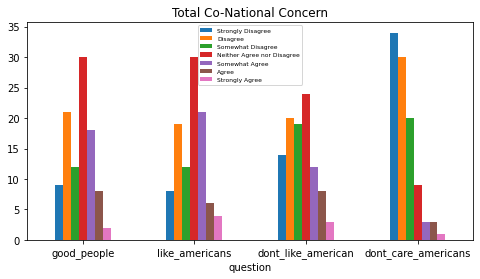

In [79]:
dicts = []
for i in concern_co_nat:
    x = survey[i]

    # use the Counter class from collections to create a dictionary with keys(text) and frequency
    name = i + "_dict"
    name = Counter(x)
    dicts.append(name)

df_co_nat_final = pd.DataFrame.from_dict(dicts)
df_co_nat_final["question"] = concern_co_nat

df_co_nat_final.plot(x="question", y = ["Strongly Disagree", "Disagree", "Somewhat Disagree",
"Neither Agree nor Disagree","Somewhat Agree",  "Agree", "Strongly Agree"], kind = "bar", figsize = (8,4), rot=0)
plt.legend(fontsize = 6, loc="upper center")
plt.title("Total Co-National Concern")

Text(0.5, 1.0, 'Black Concern for Co-Nationals')

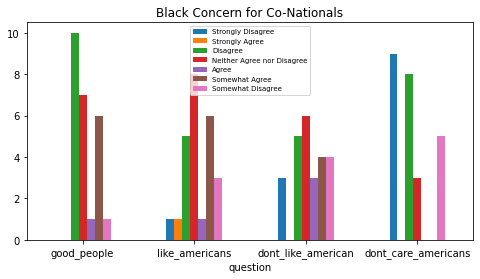

In [330]:
dicts = []
for i in concern_co_nat:
    x = df_black[i]

    # use the Counter class from collections to create a dictionary with keys(text) and frequency
    name = i + "_dict"
    name = Counter(x)
    dicts.append(name)

df_co_nat_final = pd.DataFrame.from_dict(dicts)
df_co_nat_final["question"] = concern_co_nat

df_co_nat_final.plot(x="question", y = ["Strongly Disagree", "Disagree", "Somewhat Disagree",
"Neither Agree nor Disagree","Somewhat Agree",  "Agree", "Strongly Agree"], kind = "bar", figsize = (8,4), rot=0)
plt.legend(fontsize = 7, loc="upper center")
plt.title("Black Concern for Co-Nationals")



Text(0.5, 1.0, 'Latino Concern for Co-Nationals')

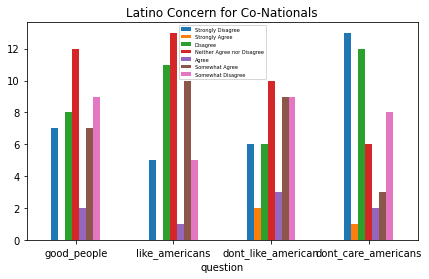

In [332]:
dicts = []
for i in concern_co_nat:
    x = df_latino[i]

    # use the Counter class from collections to create a dictionary with keys(text) and frequency
    name = i + "_dict"
    name = Counter(x)
    dicts.append(name)

df_co_nat_final = pd.DataFrame.from_dict(dicts)
df_co_nat_final["question"] = concern_co_nat

df_co_nat_final.plot(x="question", y = ["Strongly Disagree", "Disagree", "Somewhat Disagree",
"Neither Agree nor Disagree","Somewhat Agree",  "Agree", "Strongly Agree"], kind = "bar", figsize = (7,4), rot=0)
plt.legend(fontsize = 5, loc = "upper center")
plt.title("Latino Concern for Co-Nationals")


Text(0.5, 1.0, 'Asian Concern for Co-Nationals')

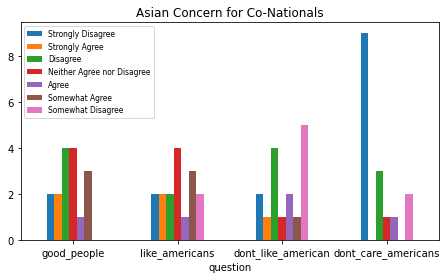

In [335]:
dicts = []
for i in concern_co_nat:
    x = df_asian[i]

    # use the Counter class from collections to create a dictionary with keys(text) and frequency
    name = i + "_dict"
    name = Counter(x)
    dicts.append(name)

df_co_nat_final = pd.DataFrame.from_dict(dicts)
df_co_nat_final["question"] = concern_co_nat

df_co_nat_final.plot(x="question", y = ["Strongly Disagree", "Disagree", "Somewhat Disagree",
"Neither Agree nor Disagree","Somewhat Agree",  "Agree", "Strongly Agree"], kind = "bar", figsize = (7.5,4), rot=0)
plt.legend(fontsize = 7.5)
plt.title("Asian Concern for Co-Nationals")
